**Project Members:**

Chong Shih Yang Samuel (U2222197E)

Chiang Wen Xi (U2310824L)

Cheng XinYa (N2504091C)

**Project Contribution:**


Cheng XinYa, Chiang Wen Xi and Samuel Chong jointly completed the main experiments and documentation work of this project.

We jointly completed the test of the code, deeply studied and verified the implementation effect of the optimiser and the learning rate scheduler. At the same time, we were also working on the formatting of the code and the writing of the overall description to ensure the stable operation of the project, the clear structure and the complete explanation.

**Project description:**

There is a toy character-level NanoGPT model pretrained on web-crawled Question Answering (QA) data. It can only handle some simple QA problems, such as “what’s your name?⎯ My name is John". As math problems were not included during pretraining, the NanoGPT cannot give correct responses to this type of questions. Hence, we will use the Reinforcement Learning (RL) algorithm DPO in this project to teach this toy NanoGPT to solve some simple algebra and arithmetic problems.

**Explanation and Rationale**

Although the toy character-level NanoGPT model demonstrates basic question-answering capabilities, it struggles with arithmetic and algebraic problems because mathematical reasoning and symbolic computation were absent from its pretraining data. This reveals significant limitations in its generalization and logical reasoning abilities: the model can reproduce language patterns but fails to solve structured, reasoning-based tasks.

To overcome these limitations, we introduce Direct Preference Optimization (DPO) — a reinforcement learning (RL) algorithm that directly aligns the model’s output distribution with desired behaviors based on preference data, without relying on an explicit reward model. This approach provides a more stable and efficient alternative to traditional RLHF (Reinforcement Learning with Human Feedback), making it well-suited for fine-tuning lightweight language models like NanoGPT.


**Task 1: Building dataset:**

We will use a for loop and random to generate as many samples as we would like. For each loop, the loop will randomly select one of the operations and create a positive-negative pair and store it into the data list. Initially, we started with simple arithmetic equations like adition and division etc. But after testing we realised that we also needed to consider equations with an unknown variable, hence the inclusion of algebraAdd and algebraSub etc.

Finally, We tested differing numbers of sample sizes like 10,000 and 50,000 but we chose to generate 100,000 data values as this gave us the best performance for our NanoGPT.

In [ ]:
import json
import random

data = []

def makeExamples(samples=100000):
    for _ in range(samples):
        operation = random.choice(["+", "-", "*", "/", "algebraAdd", "algebraSub", "algebraMul", "algebraDiv"])

        if operation in ["+", "-", "*", "/"]:
            a = random.randint(1, 100)
            b = random.randint(1, 100)

            if operation == "/":
                answer = a / b
                problem = f"{a}/{b}=?"
                positive = f"{problem} The answer is {answer} because {a}/{b} equals {answer}."
            elif operation == "+":
                answer = a + b
                problem = f"{a}+{b}=?"
                positive = f"{problem} The answer is {answer} because {a}+{b} equals {answer}."
            elif operation == "-":
                answer = a - b
                problem = f"{a}-{b}=?"
                positive = f"{problem} The answer is {answer} because {a}-{b} equals {answer}."
            elif operation == "*":
                answer = a * b
                problem = f"{a}*{b}=?"
                positive = f"{problem} The answer is {answer} because {a}*{b} equals {answer}."

        else:
            a = random.randint(10, 100)
            b = random.randint(1, 50)

            if operation == "algebraAdd":
                answer = a - b
                problem = f"x+{b}={a},x=?"
                positive = f"{problem} The answer is {answer} because {answer}+{b} equals {a}."

            elif operation == "algebraSub":
                answer = a - b
                problem = f"{a}-x={b},x=?"
                positive = f"{problem} The answer is {answer} because {a}-{answer} equals {b}."

            elif operation == "algebraMul":
                answer = a / b
                problem = f"x*{b}={a},x=?"
                positive = f"{problem} The answer is {answer} because {answer}*{b} equals {a}."

            elif operation == "algebraDiv":
                answer = a / b
                problem = f"{a}/x={b},x=?"
                positive = f"{problem} The answer is {answer} because {a}/{answer} equals {b}."

        negative = f"{problem} Sorry, I do not know!"

        data.append({"negative": negative, "positive": positive})

    return data

dataset = makeExamples(100000)

with open("pos_neg_pairs.json", "w") as f:
    json.dump(dataset, f, indent=2)

print("Dataset saved with", len(dataset), "examples")

Dataset saved with 100000 examples


**Display small sample size**

Just for visualisation and checking purposes, this line of code generates out a small list of pos-neg pairs. The user can change the range of values to view within the data set as they please.

In [ ]:
data [0:7]

[{'negative': 'x+33=14,x=? Sorry, I do not know!',
  'positive': 'x+33=14,x=? The answer is -19 because -19+33 equals 14.'},
 {'negative': 'x*50=60,x=? Sorry, I do not know!',
  'positive': 'x*50=60,x=? The answer is 1.2 because 1.2*50 equals 60.'},
 {'negative': '48*69=? Sorry, I do not know!',
  'positive': '48*69=? The answer is 3312 because 48*69 equals 3312.'},
 {'negative': '72-x=32,x=? Sorry, I do not know!',
  'positive': '72-x=32,x=? The answer is 40 because 72-40 equals 32.'},
 {'negative': '69*12=? Sorry, I do not know!',
  'positive': '69*12=? The answer is 828 because 69*12 equals 828.'},
 {'negative': '50*93=? Sorry, I do not know!',
  'positive': '50*93=? The answer is 4650 because 50*93 equals 4650.'},
 {'negative': '56/89=? Sorry, I do not know!',
  'positive': '56/89=? The answer is 0.6292134831460674 because 56/89 equals 0.6292134831460674.'}]

**Installing necessary packages**

For devices with GPU comment out "pip install torch torchvision torchaudio", this line will essentially install a CPU-only version of PyTorch and hence the the GPU will not be utilised. Commenting out this line will allow the environment to utilise GPU-enabled version of PyTorch allowing us to leverage CUDA for accelerated computations.

In [ ]:
!pip install matplotlib
!pip install torch numpy transformers datasets tiktoken wandb tqdm


**CUDA Check**

Just to check if environment is on CPU or GPU

In [ ]:
import torch
print(torch.__version__)
print("MPS available:", torch.backends.mps.is_available())
print("CUDA available:", torch.cuda.is_available())  # True = CUDA cores are available
print("CUDA device count:", torch.cuda.device_count())
print("Current device:", torch.cuda.current_device())
print("Device name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "None")

2.8.0+cu126
MPS available: False
CUDA available: True
CUDA device count: 1
Current device: 0
Device name: Tesla T4


 **Task 2**

The skeleton code that was provided for this assignment was used to create and set up the environment.

We added a fallback index for Out Of Vocabulary (OOV) chars to stop Python from raising keyerrors. We trained on all data instead of dropping partial batches, implemented the preference loss with masking, normalized generation outputs for testing and used deterministic decoding and OOV checks to distinguish true model behavior from sampling noise.

In short, we are setting up the environment and importing various packages as well as setting some configurations to use later on.

Remember to add the respective files needed to run the code as follows:
1. meta.pkl
2. model.py
3. gpt.pt
4. configurator.py

We have modified the following training configurations:
1. beta - from 0.5 to 2 --> This was modified to allow the model to increase the distinction between "good" and "bad" samples, allowing it to learn faster and give better results.
2. temperature - from 0.8 to 1e-8 --> As our model aims to produce accurate math results, we reduced temperature to reduce "creativity" and allow for more deterministic outputs.

In [ ]:
import sys
import os
sys.path.append(os.path.abspath(".."))

import torch
import torch.nn as nn
import torch.nn.functional as F
import random
import pickle
from model import GPT, GPTConfig
from tqdm import tqdm
import time
import json
import matplotlib.pyplot as plt

device = "cuda" if torch.cuda.is_available() else "cpu"
print("CUDA available:", torch.cuda.is_available())
print("CUDA device count:", torch.cuda.device_count())
if torch.cuda.is_available():
    print("Using GPU:", torch.cuda.get_device_name(0))
    print("Using device:", device)

beta = 2
base_lr = 1e-4
epochs = 5
batch_size = 64
max_length = 64
num_samples = 1
max_new_tokens = 200
temperature = 1e-8
top_k = 200

with open("meta.pkl", "rb") as f:
    meta = pickle.load(f)
stoi, itos = meta["stoi"], meta["itos"]

PAD_IDX = 0
UNK_IDX = stoi.get("<unk>", stoi.get(" ", PAD_IDX))
def encode(s: str):
    return [stoi.get(c, UNK_IDX) for c in s]

def decode(ids):
    return ''.join(itos[i] for i in ids if 0 <= i < len(itos))

config = GPTConfig(
    vocab_size=len(stoi),
    block_size=max_length
)
model = GPT(config).to(device)
print(f"Model is on device: {next(model.parameters()).device}")

x = torch.randint(0, len(stoi), (batch_size, max_length), dtype=torch.long, device=device)
print("Tensor is on:", x.device)

CUDA available: True
CUDA device count: 1
Using GPU: Tesla T4
Using device: cuda
Model is on device: cuda:0
Tensor is on: cuda:0


**Define helper functions**

First, import the necessary libraries and set the system path to ensure that the model files can be called correctly. Subsequently, the hardware environment is detected and the GPU or CPU is automatically selected to fully utilize the computing resources.

Next, we define the training hyperparameters, such as the learning rate *(1e-4)*, batch size *(64)*, sequence length *(64)*, and sampling temperature *(1e-8)*. After our multiple tests, we have concluded that these settings strike a balance among model size, training stability, and memory usage, ensuring efficient and stable training. Then, we load the tokenizer from meta.pkl, establish the character and index mapping, and define the encoding and decoding functions to achieve the conversion between text and token.

Finally, the GPT model is instantiated by configuring the vocabulary size and context length, loaded onto the device, and the device consistency between the model and the data is verified using random tensors, laying the foundation for subsequent training and fine-tuning.

In [ ]:
def compute_logprob(input_ids):
    inputs = input_ids[:, :-1]
    targets = input_ids[:, 1:]
    logits, _ = gpt(inputs, full_seq=True)
    B, T, V = logits.size()
    logits_flat = logits.reshape(-1, V)
    targets_flat = targets.reshape(-1)
    loss = F.cross_entropy(logits_flat, targets_flat, ignore_index=0, reduction='none')
    loss = loss.reshape(B, T)
    attention_mask = (targets != 0).float()
    loss = (loss * attention_mask).sum(dim=1) / attention_mask.sum(dim=1)
    return -loss

def pad_or_truncate(seq, max_length):
    return seq[-max_length:] if len(seq) > max_length else seq + [0] * (max_length - len(seq))

def get_batches(lines, batch_size):
    random.shuffle(lines)
    for i in range(0, len(lines), batch_size):
        batch = lines[i:i+batch_size]
        if len(batch) < batch_size:
            continue
        neg_inputs = [pad_or_truncate(encode(p['negative'] + '\n\n\n\n'), max_length) for p in batch]
        pos_inputs = [pad_or_truncate(encode(p['positive'] + '\n\n\n\n'), max_length) for p in batch]
        neg_tensor = torch.tensor(neg_inputs, dtype=torch.long, device=device)
        pos_tensor = torch.tensor(pos_inputs, dtype=torch.long, device=device)
        yield neg_tensor, pos_tensor

**Load the pre-trained NanoGPT**

We first load the pretrained NanoGPT model from a checkpoint file (gpt.pt). The checkpoint dictionary maps all tensors to either CUDA or CPU depending on the available device. We then reconstruct the model configuration from the stored arguments, instantiate the GPT model, and remove unwanted prefixes (e.g., _orig_mod.) left over from distributed training to ensure parameter name consistency. Finally, the cleaned weights are loaded into the model, which is moved to the target device and set to training mode.



In [ ]:
ckpt = torch.load("gpt.pt", map_location=device)
gptconf = GPTConfig(**ckpt['model_args'])
gpt = GPT(gptconf)
state_dict = ckpt['model']
unwanted_prefix = '_orig_mod.'

for i in list(state_dict.keys()):
    if i.startswith(unwanted_prefix):
        state_dict[i[len(unwanted_prefix):]] = state_dict.pop(i)

gpt.load_state_dict(state_dict)
gpt.to(device).train()

GPT(
  (transformer): ModuleDict(
    (wte): Embedding(74, 348)
    (wpe): Embedding(256, 348)
    (drop): Dropout(p=0.2, inplace=False)
    (h): ModuleList(
      (0-5): 6 x Block(
        (ln_1): LayerNorm()
        (attn): CausalSelfAttention(
          (c_attn): Linear(in_features=348, out_features=1044, bias=False)
          (c_proj): Linear(in_features=348, out_features=348, bias=False)
          (attn_dropout): Dropout(p=0.2, inplace=False)
          (resid_dropout): Dropout(p=0.2, inplace=False)
        )
        (ln_2): LayerNorm()
        (mlp): MLP(
          (c_fc): Linear(in_features=348, out_features=1392, bias=False)
          (gelu): GELU(approximate='none')
          (c_proj): Linear(in_features=1392, out_features=348, bias=False)
          (dropout): Dropout(p=0.2, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm()
  )
  (lm_head): Linear(in_features=348, out_features=74, bias=False)
)

**Load Data**

Below we just load the pos-neg pairs that we generated previously into a dictionary. We import json module which lets us read/write json files, then we pass in the json file to be read and stored. For this step, we generate a line showing us the total lines loaded, as well as an example to ensure that the data we have loaded is accurate.

In [ ]:
import json

data_path = "pos_neg_pairs.json"

with open(data_path, "r") as f:
    lines = json.load(f)

print(f"Loaded {len(lines)} pos-neg pairs")
print("Example:", lines[random.randint(1,100)])

Loaded 100000 pos-neg pairs
Example: {'negative': '63-x=7,x=? Sorry, I do not know!', 'positive': '63-x=7,x=? The answer is 56 because 63-56 equals 7.'}


# **Build optimiser and scheduler**

For this project, we will be referencing AdamW algorithm from here:


*   https://docs.pytorch.org/docs/stable/generated/torch.optim.AdamW.html
*   https://github.com/pytorch/pytorch/blob/v2.8.0/torch/optim/adamw.py#L21

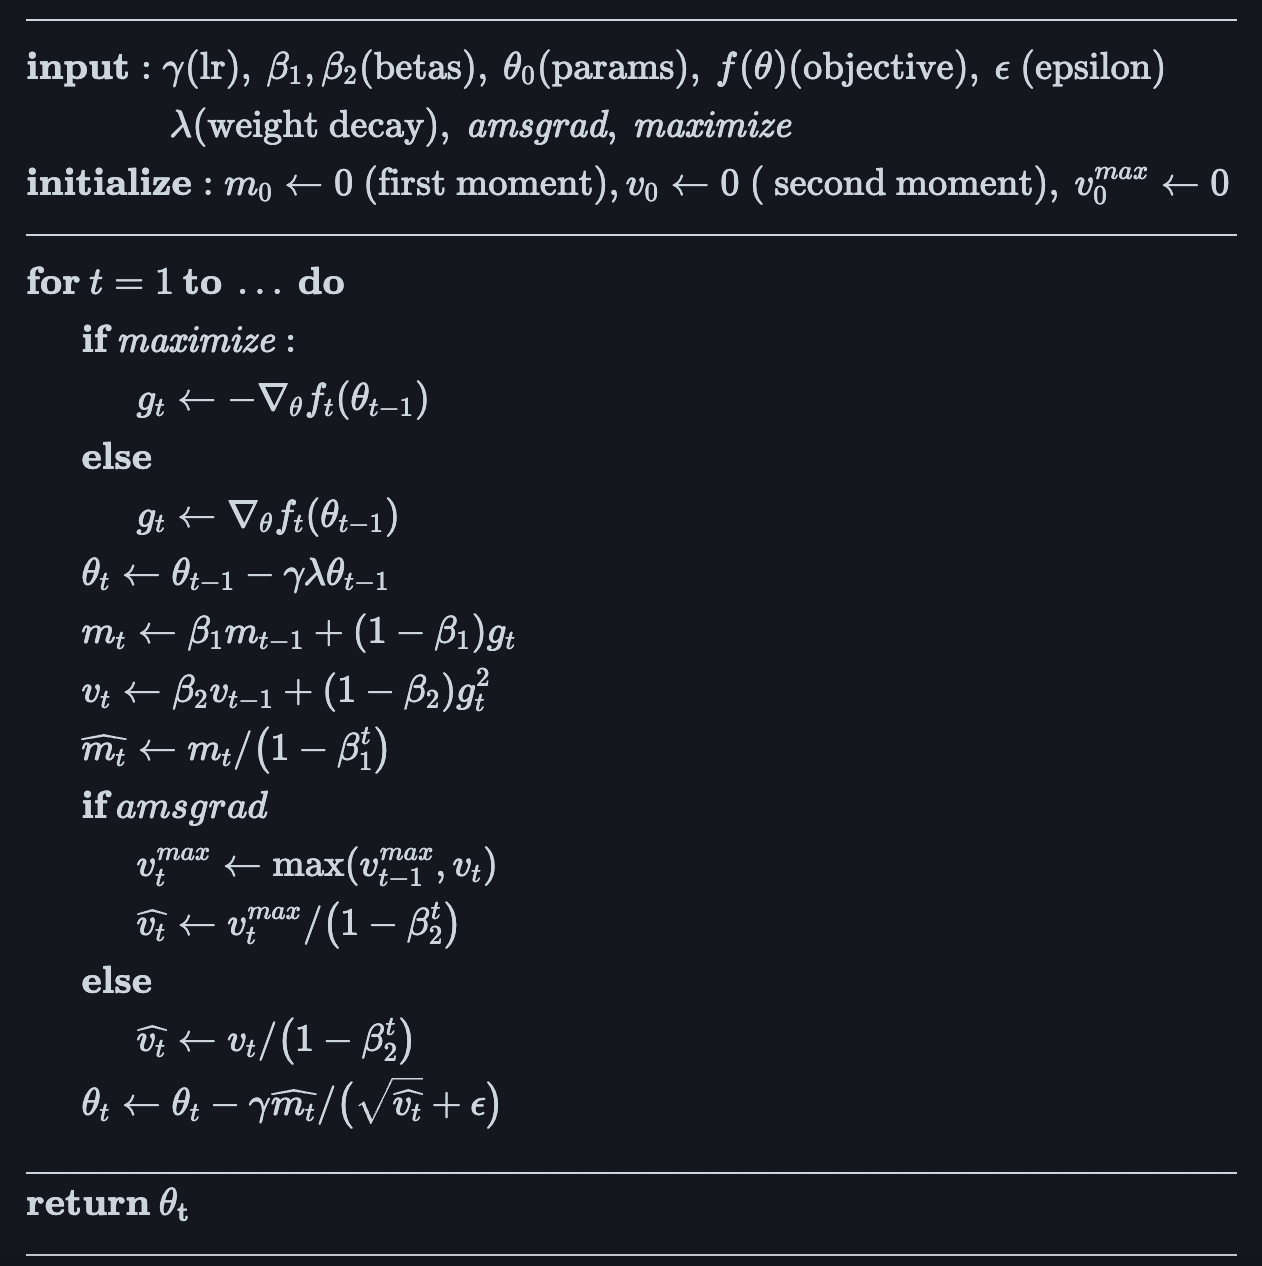


We chose to use the AdamW optimiser as it is highly adaptive, and leads to better generalisation. It works by applying weight decay to shrink parameters and prevent overfitting. To prevent weight decay being applied on biases, norms or embeddings, our code assigns the above to a list of parameters that should not get weight decay, and it is assigned a weight of 0.

For our scheduler, it consists of 2 phases, the warm up phase and cosine decay phase. The warm up phase increases the learning rate linearly from 0 to the base rate, preventing divergence in the first 10% of steps taken. Thererafter, the cosine decay phase increases the learning rate at first, before gradually decreasing it to near 0.

**About parameter selection:**

1. Weight Decay = 0.1 provides a moderate regularization strength, which can effectively prevent overfitting without inhibiting model learning;
2. Learning Rate = 1e-3 is a commonly used and stable learning rate of AdamW on small Transformers (such as NanoGPT), which not only avoids divergence caused by an overly large learning rate but also prevents slow convergence due to an overly small one.
3. Betas = (0.9, 0.999) is the default decay rate of the first and second order moment of the optimiser
4. Eps = 1e-8 belong to the standard settings of the Adam series, which are used to maintain gradient smoothing and numerical stability.
5. Warmup ≈ 3% enables the learning rate to gradually increase in the early stage of training, avoiding instability caused by excessive gradients in the initial stage.

We have fixed Min LR Ratio = 0.1 to ensure that the learning rate does not completely drop to zero, thus enabling fine-tuning in the later stage of training. When Max Grad Norm = 1.0, gradient explosion is prevented by limiting the gradient size.

Overall, these hyperparameters constitute a stable combination that has been proven through practice, which can help the model achieve rapid convergence, stable training, and reduce overfitting with limited resources.

In [ ]:
import math
import torch
from torch.optim import AdamW
from torch.optim.lr_scheduler import LambdaLR

wd = 0.1
base_lr = 1e-3
betas = (0.9, 0.999)
eps = 1e-8
max_grad_norm = 1.0

decay, no_decay = [], []
for n, p in gpt.named_parameters():
    if not p.requires_grad:
        continue
    is_bias = n.endswith(".bias")
    is_norm = ("norm" in n.lower()) or ("ln" in n.lower())
    is_embed = "embed" in n.lower()
    if is_bias or is_norm or is_embed:
        no_decay.append(p)
    else:
        decay.append(p)

optimizer = AdamW(
    [
        {"params": decay, "weight_decay": wd},
        {"params": no_decay, "weight_decay": 0.0},
    ],
    lr=base_lr,
    betas=betas,
    eps=eps,
)

steps_per_epoch = len([1 for _ in range(0, len(lines), batch_size)])
total_steps = epochs * steps_per_epoch
warmup_steps = max(1, int(0.03 * total_steps))

def lr_lambda(step):
    warmup_ratio = 0.03
    min_lr_ratio = 0.1

    warmup_steps = int(total_steps*warmup_ratio)
    min_factor = min_lr_ratio

    if step < warmup_steps:
        return float(step) / float(max(1, warmup_steps))

    progress = (step - warmup_steps) / float(max(1, total_steps - warmup_steps))
    cosine_decay = 0.5*(1.0 + math.cos(math.pi*progress))
    return min_factor + (1-min_factor)*cosine_decay

scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, lr_lambda=lr_lambda)

print(f"Total steps: {total_steps}, Warmup steps: {warmup_steps}")

Total steps: 15630, Warmup steps: 468


**Begin Training**

First, we put the model into training mode, and calculate the total steps taken per epoch. The code then gets tensors as negative and positive samples.

For each batch, we compute sequence log-probabilities for positive and negative completions. The code calculates the difference between the 2, divide it by beta to control sharpness of distinction, and turns it into a smooth preference loss. It then creates an anchor term, which ensures the model remembers how to assign high likelihoods.

The code then calls on the optimiser and scheduler to train the model. A file labelled dpo.pt will then be generated, containing a GPT model fine-tuned with preference data.



In [ ]:
total_steps = len(lines) // batch_size
for epoch in range(epochs):
    pbar = tqdm(get_batches(lines, batch_size))
    for step, (neg_tensor,pos_tensor) in enumerate(pbar):

        pos_logprob = compute_logprob(pos_tensor)
        neg_logprob = compute_logprob(neg_tensor)

        beta = 0.1

        preference_term = -F.logsigmoid((pos_logprob - neg_logprob) / beta).mean()
        anchor_term      = -0.10 * pos_logprob.mean()
        loss = preference_term + anchor_term

        optimizer.zero_grad(set_to_none=True)
        loss.backward()
        total_norm = 0.0
        for p in gpt.parameters():
            if p.grad is not None:
                    param_norm = p.grad.data.norm(2)
                    total_norm += param_norm.item() ** 2
        total_norm = total_norm ** 0.5


        torch.nn.utils.clip_grad_norm_(gpt.parameters(), max_grad_norm)
        optimizer.step()
        scheduler.step()

        if (step + 1) % 50 == 0:
            pbar.set_postfix({
                "loss": f"{loss.item():.4f}\n",
                "pref": f"{preference_term.item():.4f}\n",
                "lr": f"{scheduler.get_last_lr()[0]:.2e}\n",
            })

    ckpt_path = f"dpo.pt"
    torch.save({
        "model_state_dict": gpt.state_dict(),
        "model_args": ckpt['model_args'],
    }, ckpt_path)
    print(f"Saved checkpoint to {ckpt_path}")

1562it [04:31,  5.75it/s, loss=0.0324, pref=0.0000, lr=1.00e-04]


Saved checkpoint to dpo.pt


809it [02:19,  5.81it/s, loss=0.0301, pref=0.0000, lr=5.89e-04]

**Task 3: Begin Testing**

For this section, we added a function "to_flat_int_list". This function ensures any input object containing token IDs becomes a flat list of integers, ensuring that our output remains consistent.

Explanation for main test code:
The code encodes each prompt into token IDs for the model, feeds the prompt to the model and asks it to produce new tokens based on the input. It then converts the output by the model into a clean list of token IDs, before turning it back into readable text. The final output shows the prompt, as well as the model's answer to it.

In [ ]:
ckpt_path = "dpo.pt"
checkpoint = torch.load(ckpt_path, map_location=device)
gptconf = GPTConfig(**checkpoint['model_args'])

gpt = GPT(gptconf).to(device)
try:
    state_dict = checkpoint['model']
except:
    state_dict = checkpoint['model_state_dict']
unwanted_prefix = '_orig_mod.'
for k,v in list(state_dict.items()):
    if k.startswith(unwanted_prefix):
        state_dict[k[len(unwanted_prefix):]] = state_dict.pop(k)
gpt.load_state_dict(state_dict)

gpt.eval()
test_set = ["17+19=?", "3*17=?", "72/4=?", "72-x=34,x=?", "x*11=44,x=?", "3*17=?", "72/4=?", "72-x=34,x=?"]

def to_flat_int_list(obj):
    """Flatten Tensor/list/tuple of token ids to a 1-D Python list[int]."""
    import torch as _torch
    if isinstance(obj, _torch.Tensor):
        return obj.detach().cpu().reshape(-1).tolist()
    if isinstance(obj, (list, tuple)):
        out = []
        for el in obj:
            out.extend(to_flat_int_list(el))
        return out
    return [int(obj)]

with torch.no_grad():
    for prompt in test_set:
        ids = encode(prompt)
        x = torch.tensor([ids], dtype=torch.long, device=device)

        y = gpt.generate(x, max_new_tokens=max_new_tokens,
                         temperature=temperature, top_k=top_k)

        if isinstance(y, torch.Tensor):
            seq = y[0] if y.dim() >= 2 else y
            gen = seq.detach().cpu().reshape(-1).tolist()
        else:
            seq = y[0] if isinstance(y, (list, tuple)) else y
            gen = to_flat_int_list(seq)

        if len(gen) >= len(ids) and gen[:len(ids)] == ids:
            full_ids = gen
        else:
            full_ids = ids + gen

        full_text = decode(full_ids)
        gen_text = full_text[len(prompt):].split("\n")[0].strip()
        print(f"Q: {prompt}  ->  {gen_text}")